Find locations of objects and walls in the dataset, and create plots containing them. Also create array plot of example motifs.

In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datasets

Populating the interactive namespace from numpy and matplotlib


In [6]:
dataset = '2014'
#data = xr.open_dataset(f'../xarray/{dataset}.nc')
data = datasets.load('2014')

In [7]:
data

<xarray.Dataset>
Dimensions:      (rat: 8, session: 10, time: 45000)
Coordinates:
  * rat          (rat) object '110' '112' '114' '109' '111' '113' '115' '117'
  * session      (session) object 'injection1' 'injection2' 'injection3' ...
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    (rat) object 's' 's' 's' 'q' 'q' 'q' 'q' 'q'
    trial        (rat, session) object '5' '17' '29' '41' '53' '65' '77' ...
Data variables:
    area         (rat, session, time) float64 58.74 58.31 51.87 51.18 51.18 ...
    areachange   (rat, session, time) float64 14.86 13.48 12.28 11.85 12.71 ...
    direction    (rat, session, time) float64 147.6 137.3 135.0 129.3 130.0 ...
    elongation   (rat, session, time) float64 0.7867 0.7429 0.7395 0.7292 ...
    time_offset  (rat, session) float64 8.04 5.04 8.52 7.2 6.6 9.12 8.76 ...
    x            (rat, session, time) float64 -3.408 -3.288 -3.142 -2.898 ...
    y            (rat, session, time) float64 2.523 2.725 2.976 3.

(-82.462500000000006,
 92.712500000000006,
 -85.150000000000006,
 88.650000000000006)

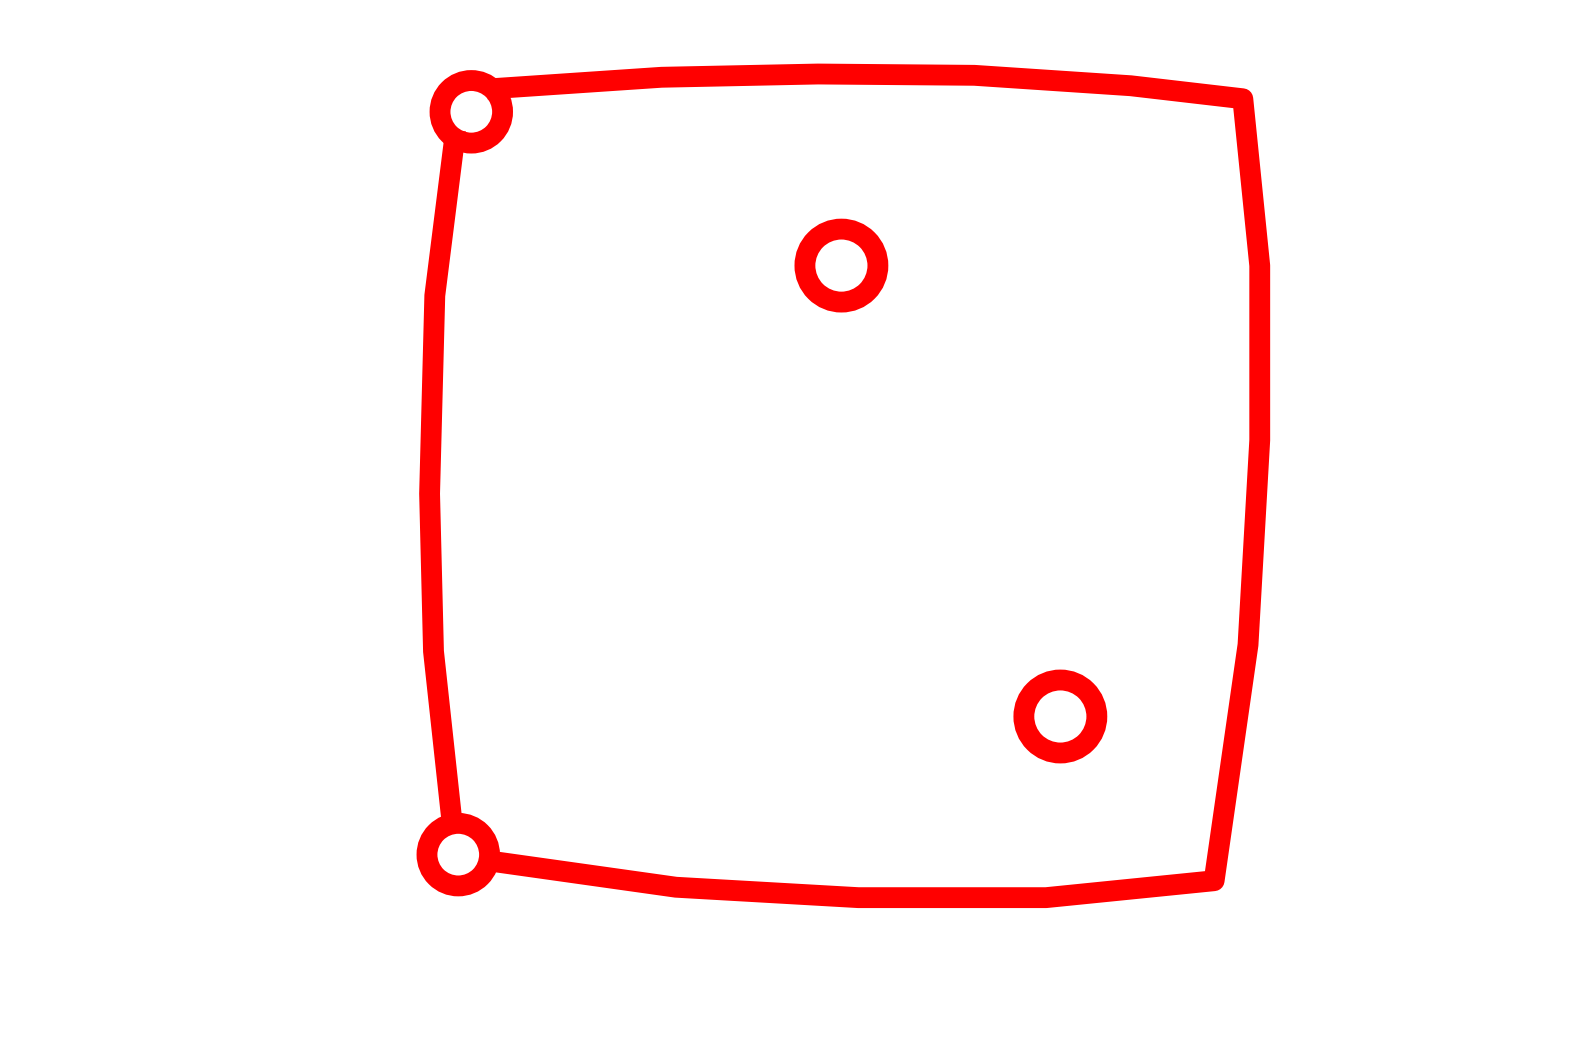

In [7]:
# plt.rcParams['figure.figsize'] = (5,5)
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
# ax.set_xlim(-100,100)
# ax.set_ylim(-100,100)
for rat in data.rat:
    for session in data.sel(rat=rat).session:
        d = data.sel(rat=rat,session=session)
        #plt.plot(d.x,d.y,alpha=0.1)

circles = [((46.5, -42.5),7),((4.5, 44),7),((-69, -69),6),((-66.5, 73.5),6)]
for circle,radius in circles:
    ax.add_artist(plt.Circle(circle, radius, color='r', fill=False, lw=5,zorder=-1))
    
edges = ([(-61.5,78),(-30,80.125),(0,80.75),(30,80.5),(60,78.5),
          (81.5,76),(84.75,44),(84.75,10.5),(82.5,-28.75),
          (76,-74),(43.75,-77.25),(7.75,-77.25),(-27.25,-75.25),
          (-62.75,-70.25)],
         [(-70.25,-62.25),(-73.75,-30),(-74.5,0.25),(-73.5,38.25),(-69.75,68)])
for edge in edges:
    plt.plot(*zip(*edge),lw=5,color='r',alpha=1,zorder=-1)
plt.axis('off')

In [8]:
xstart = 552
ystart = 538
xscale = 100/(901-xstart)
yscale = 100/(198-ystart)

def my_round(x):
    return round(x*4)/4

def f(i,j):
    x = my_round((i-xstart)*xscale)
    y = my_round((j-ystart)*yscale)
    return x,y
xscale,yscale

(0.28653295128939826, -0.29411764705882354)

In [9]:
l = [(307,750),(294,640),(292,537),(294,408),(309,307)]
str(list(map(lambda t:f(*t),l))).replace(' ','').replace('.0','')

'[(-70.25,-62.25),(-74,-30),(-74.5,0.25),(-74,38.25),(-69.75,68)]'

In [16]:
def plt_objects(ax):
    circles = [((46.5, -42.5),7),((4.5, 44),7),((-69, -69),6),((-66.5, 73.5),6)]
    for circle,radius in circles:
        ax.add_artist(plt.Circle(circle, radius, color='r', fill=False, lw=5,zorder=-1))

    edges = ([(-61.5,78),(-30,80.125),(0,80.75),(30,80.5),(60,78.5),
              (81.5,76),(84.75,44),(84.75,10.5),(82.5,-28.75),
              (76,-74),(43.75,-77.25),(7.75,-77.25),(-27.25,-75.25),
              (-62.75,-70.25)],
             [(-70.25,-62.25),(-73.75,-30),(-74.5,0.25),(-73.5,38.25),(-69.75,68)])
    for edge in edges:
        ax.plot(*zip(*edge),lw=5,color='r',alpha=1,zorder=-1)

(-83.503404999999987, 95.900104999999996, -86.81259, 90.60839)

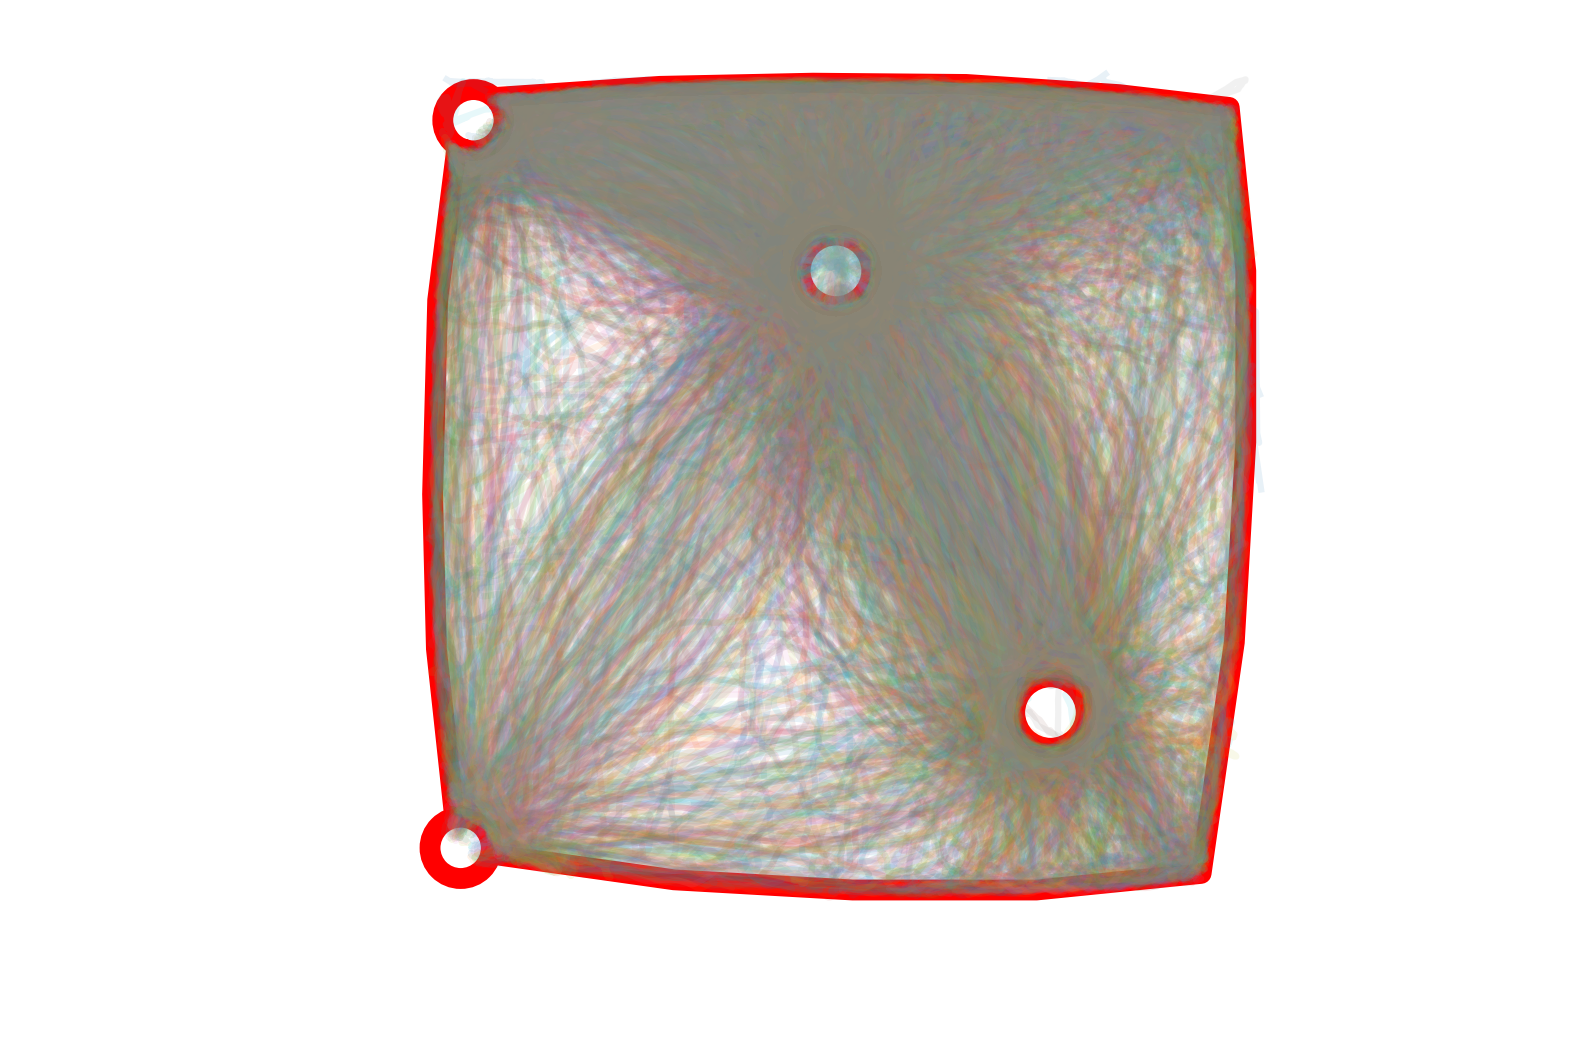

In [17]:
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
#plt.rcParams['figure.figsize'] = (15,15)
#ax.set_xlim([-120,120])
#ax.set_ylim([-120,120])
for rat in data.rat:
    for session in data.sel(rat=rat).session:
        d = data.sel(rat=rat,session=session)
        ax.plot(d.x,d.y,alpha=0.1)
plt_objects(ax)
ax.axis('off')
#ax.savefig(f'../plots/paths/{dataset}.png')

In [205]:
plt.rcParams['figure.figsize'] = (15,15)
for session in data.session:
    fig, ax = plt.subplots()
    plt.xlim([-120,120])
    plt.ylim([-120,120])
    for rat in data.sel(session=session).rat:
        d = data.sel(rat=rat,session=session)
        plt.plot(d.x,d.y,alpha=0.5)
    plt_objects(ax)
    plt.savefig(f'../plots/paths/{dataset}_{session.data}.png')
    plt.close()

In [206]:
plt.rcParams['figure.figsize'] = (15,15)
for treatment in data.treatment:
    fig, ax = plt.subplots()
    plt.xlim([-120,120])
    plt.ylim([-120,120])
    for rat in data.sel(rat=data.treatment==treatment).rat:
        d = data.sel(rat=rat,session=session)
        plt.plot(d.x,d.y,alpha=0.5)
    plt_objects(ax)
    plt.savefig(f'../plots/paths/{dataset}_{treatment.data}.png')
    plt.close()

In [207]:
plt.rcParams['figure.figsize'] = (15,15)
for rat in data.rat:
    for session in data.session:
        fig, ax = plt.subplots()
        plt.xlim([-120,120])
        plt.ylim([-120,120])
        d = data.sel(rat=rat,session=session)
        plt.plot(d.x,d.y,alpha=1)
        plt_objects(ax)
        plt.savefig(f'../plots/paths/individuals/{dataset}_{rat.data}_{session.data}.png')
        plt.close()

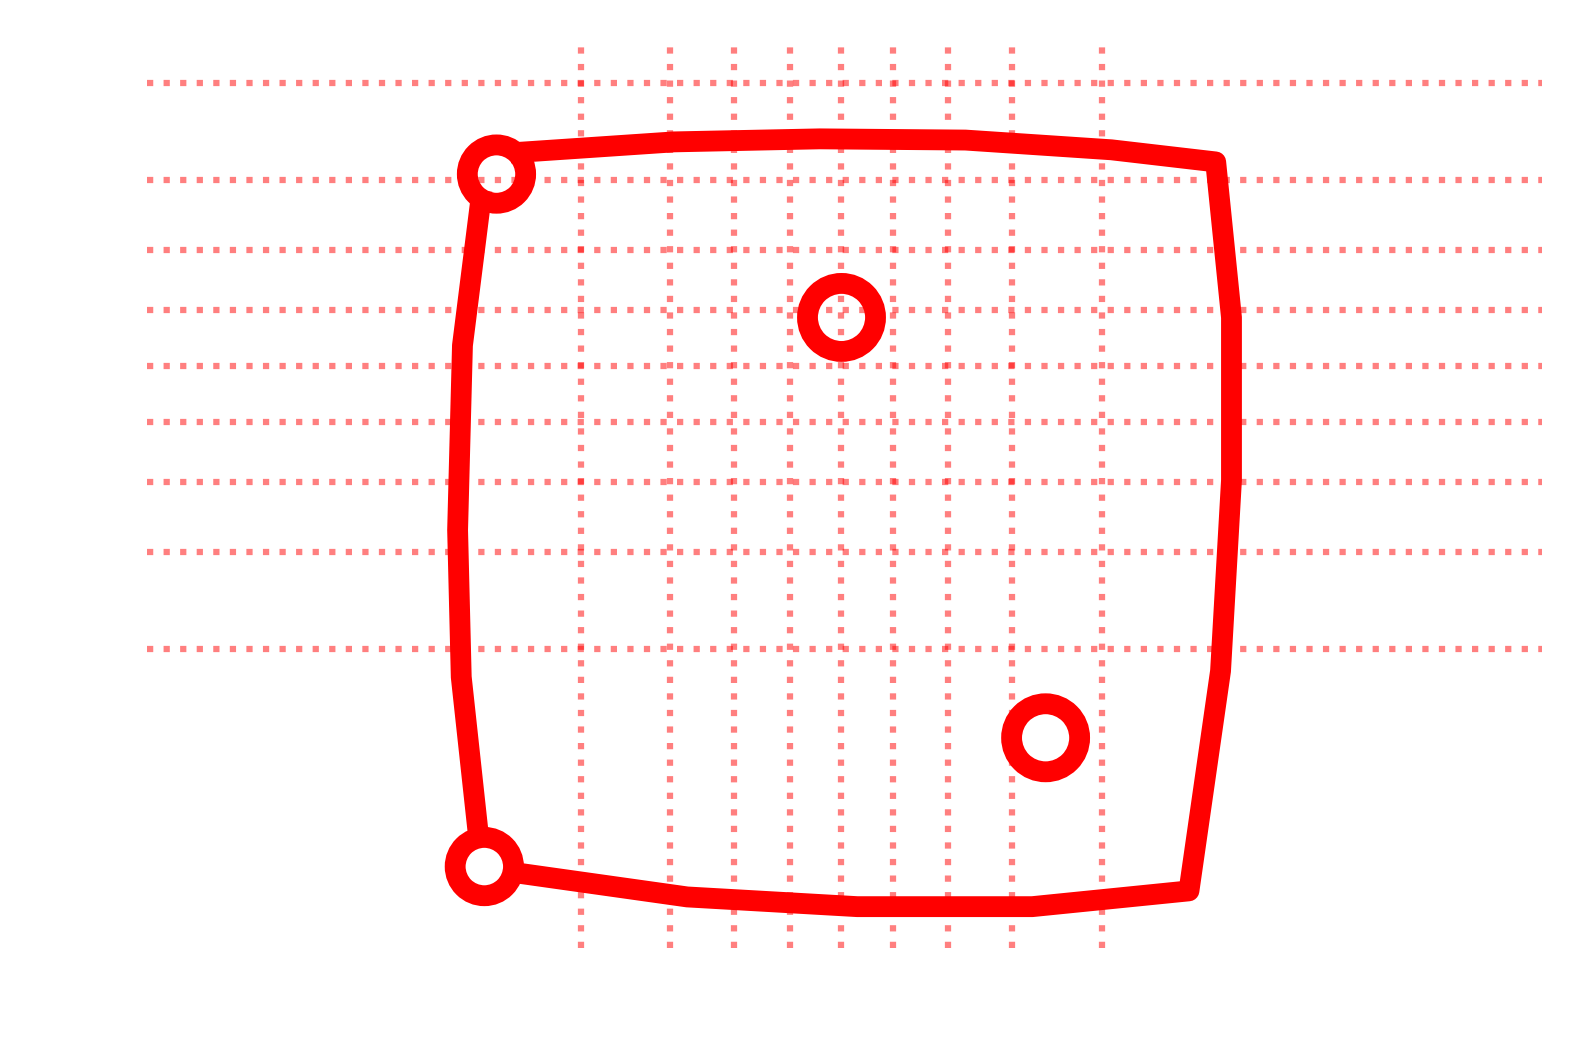

In [30]:
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
for rat in data.rat:
    for session in data.sel(rat=rat).session:
        d = data.sel(rat=rat,session=session)
        #plt.plot(d.x,d.y,alpha=0.1)

circles = [((46.5, -42.5),7),((4.5, 44),7),((-69, -69),6),((-66.5, 73.5),6)]
for circle,radius in circles:
    ax.add_artist(plt.Circle(circle, radius, color='r', fill=False, lw=5,zorder=-1))
    
edges = ([(-61.5,78),(-30,80.125),(0,80.75),(30,80.5),(60,78.5),
          (81.5,76),(84.75,44),(84.75,10.5),(82.5,-28.75),
          (76,-74),(43.75,-77.25),(7.75,-77.25),(-27.25,-75.25),
          (-62.75,-70.25)],
         [(-70.25,-62.25),(-73.75,-30),(-74.5,0.25),(-73.5,38.25),(-69.75,68)])
for edge in edges:
    ax.plot(*zip(*edge),lw=5,color='r',alpha=1,zorder=-1)
ax.axis('off')

bins = {'x': array([-49.20226447, -30.79657268, -17.52477396,  -6.1845113 ,
           4.41495947,  15.01443025,  26.3546929 ,  39.62649162,  58.03218341]),
  'y': array([-24.31490094,  -4.30948283,  10.11583112,  22.44173001,
          33.96245126,  45.48317251,  57.8090714 ,  72.23438535,  92.23980346])}

for x in bins['x']:
    ax.axvline(x, color='r', linestyle=':', alpha=0.5)
for y in bins['y']:
    ax.axhline(y, color='r', linestyle=':', alpha=0.5)
    

In [5]:

drtr = datasets.load('2014')
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
for rat in drtr.rat:
    for session in drtr.sel(rat=rat).session:
        d = drtr.sel(rat=rat,session=session)
        ax.plot(d.x, d.y, alpha=1, linewidth=0.1)
ax.axis('off')
plt.savefig(f'../plots/overlaynew.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


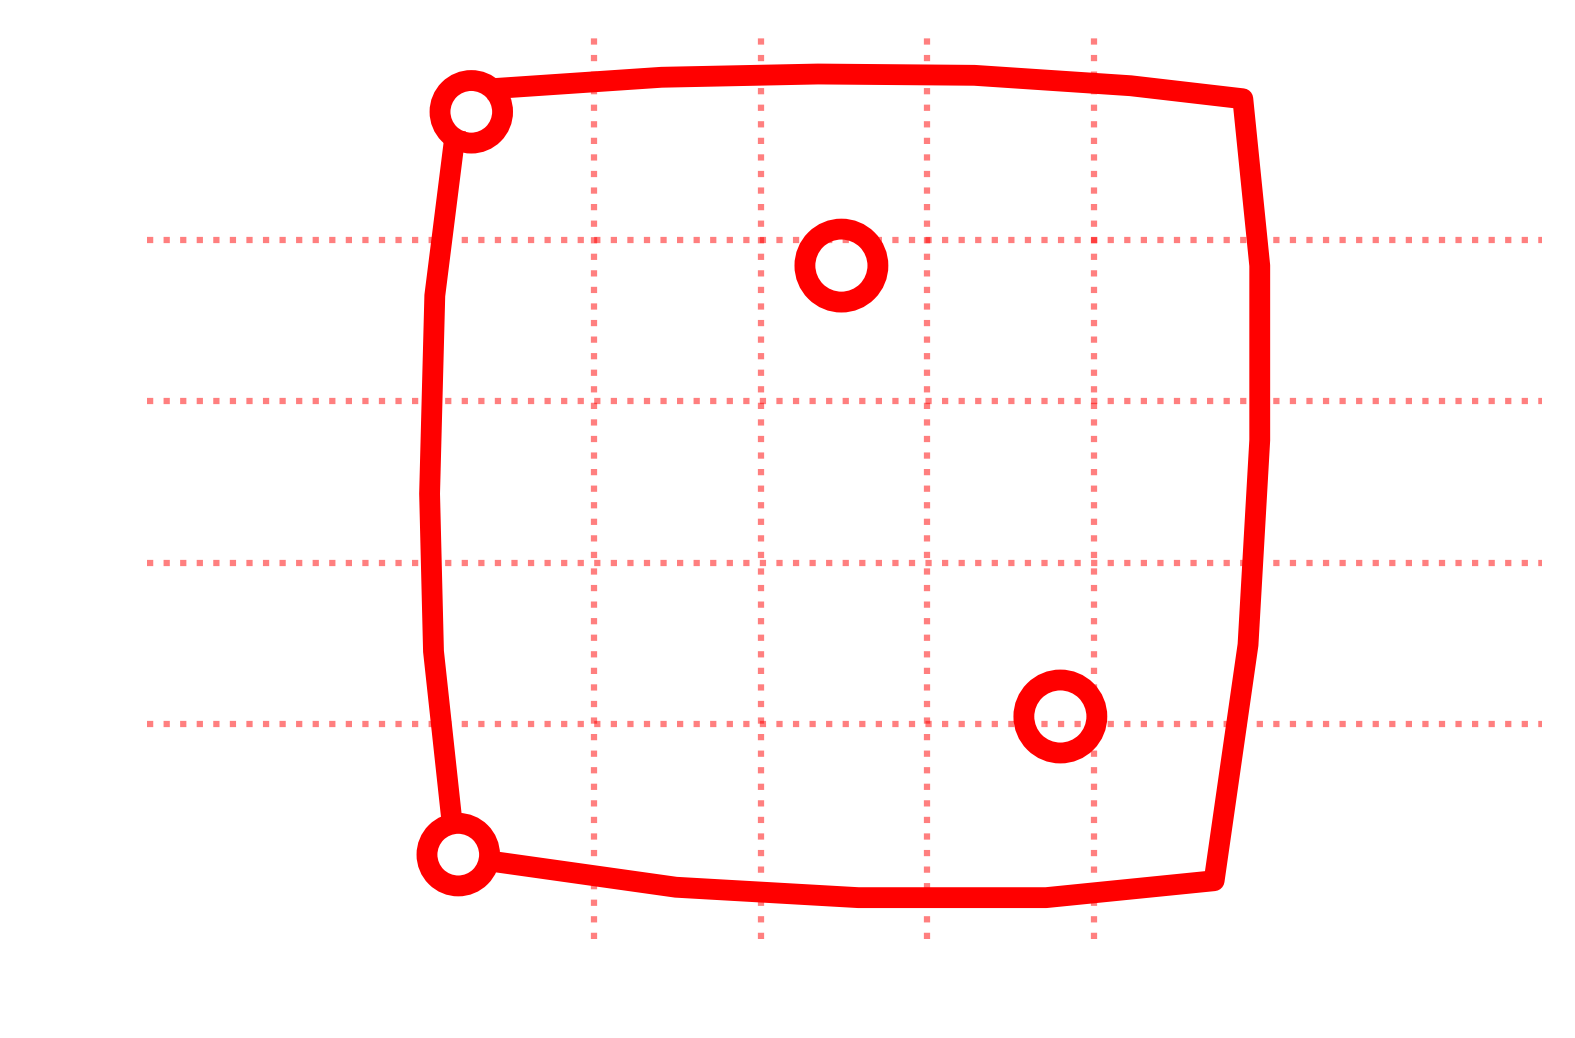

In [20]:
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
for rat in data.rat:
    for session in data.sel(rat=rat).session:
        d = data.sel(rat=rat,session=session)
        #plt.plot(d.x,d.y,alpha=0.1)

circles = [((46.5, -42.5),7),((4.5, 44),7),((-69, -69),6),((-66.5, 73.5),6)]
for circle,radius in circles:
    ax.add_artist(plt.Circle(circle, radius, color='r', fill=False, lw=5,zorder=-1))
    
edges = ([(-61.5,78),(-30,80.125),(0,80.75),(30,80.5),(60,78.5),
          (81.5,76),(84.75,44),(84.75,10.5),(82.5,-28.75),
          (76,-74),(43.75,-77.25),(7.75,-77.25),(-27.25,-75.25),
          (-62.75,-70.25)],
         [(-70.25,-62.25),(-73.75,-30),(-74.5,0.25),(-73.5,38.25),(-69.75,68)])
for edge in edges:
    ax.plot(*zip(*edge),lw=5,color='r',alpha=1,zorder=-1)
ax.axis('off')

xborders = [-75,85]
yborders = [-75,80]

n = 5
for i in range(1,n):
    x = xborders[0] + (xborders[1]-xborders[0])*i/n
    ax.axvline(x, color='r', linestyle=':', alpha=0.5)
for i in range(1,n):
    y = yborders[0] + (yborders[1]-yborders[0])*i/n
    ax.axhline(y, color='r', linestyle=':', alpha=0.5)
    

In [23]:
def contour():
    fig, ax = plt.subplots(dpi=300)
    ax.axis('equal')
    for rat in data.rat:
        for session in data.sel(rat=rat).session:
            d = data.sel(rat=rat,session=session)
            #plt.plot(d.x,d.y,alpha=0.1)

    circles = [((46.5, -42.5),7),((4.5, 44),7),((-69, -69),6),((-66.5, 73.5),6)]
    for circle,radius in circles:
        ax.add_artist(plt.Circle(circle, radius, color='r', fill=False, lw=5,zorder=-1))

    edges = ([(-61.5,78),(-30,80.125),(0,80.75),(30,80.5),(60,78.5),
              (81.5,76),(84.75,44),(84.75,10.5),(82.5,-28.75),
              (76,-74),(43.75,-77.25),(7.75,-77.25),(-27.25,-75.25),
              (-62.75,-70.25)],
             [(-70.25,-62.25),(-73.75,-30),(-74.5,0.25),(-73.5,38.25),(-69.75,68)])
    for edge in edges:
        ax.plot(*zip(*edge),lw=5,color='r',alpha=1,zorder=-1)
    ax.axis('off')
    return ax

In [287]:
prebins = {'dist_boundary': array([ -4.13100738e-02,   7.53475015e+00,   1.29976226e+01,
          1.76654457e+01,   2.20283476e+01,   2.63912496e+01,
          3.10590727e+01,   3.65219451e+01,   4.40980053e+01]),
 'dist_object': array([ -3.45514804,   5.01728744,  11.12650951,  16.34661451,
         21.22572111,  26.10482771,  31.32493271,  37.43415478,  45.90659027]),
 'pos_abs': {'x': array([-49.20226447, -30.79657268, -17.52477396,  -6.1845113 ,
           4.41495947,  15.01443025,  26.3546929 ,  39.62649162,  58.03218341]),
  'y': array([-24.31490094,  -4.30948283,  10.11583112,  22.44173001,
          33.96245126,  45.48317251,  57.8090714 ,  72.23438535,  92.23980346])},
 'pos_rel': {'x': array([ -6.47572679e-01,  -4.25276185e-01,  -2.64984772e-01,
          -1.28021670e-01,  -5.55300927e-06,   1.28010564e-01,
           2.64973666e-01,   4.25265079e-01,   6.47561573e-01]),
  'y': array([ -7.11443398e-01,  -4.67249257e-01,  -2.91168101e-01,
          -1.40713245e-01,  -8.67095623e-05,   1.40539826e-01,
           2.90994681e-01,   4.67075838e-01,   7.11269979e-01])}}

def convert(x):
    bins = prebins[x[-1]]
    if type(bins) is dict:
        xdiff = abs(bins['x'][0] - bins['x'][1])
        ydiff = abs(bins['y'][0] - bins['y'][1])
        xbins = np.concatenate(([bins['x'][0]-xdiff],bins['x'],[bins['x'][-1]+xdiff]))
        ybins = np.concatenate(([bins['y'][0]-ydiff],bins['y'],[bins['y'][-1]+ydiff]))
        r = []
        for i,j in x[2]:
            r.append(((xbins[i],ybins[j]),(xbins[i+1],ybins[j+1])))
        return r
    else:
        diff = abs(bins[0] - bins[1])
        bins = np.concatenate(([bins[0]-diff],bins,[bins[-1]+diff]))
        r = []
        for i in x[2]:
            r.append((bins[i],bins[i+1]))
        return r

In [281]:


I1 = [(11444, 2861, (2, 3), 'dist_object'),
 (9988, 2497, (3, 2), 'dist_object'),
 (7356, 1226, (3, 2, 3), 'dist_object'),
 (6580, 1645, ((0, 1), (0, 0)), 'pos_rel'),
 (5260, 1315, ((0, 0), (0, 1)), 'pos_rel'),
 (5148, 1287, ((1, 0), (0, 0)), 'pos_rel'),
 (4976, 1244, (8, 9), 'dist_boundary'),
 (4944, 1236, ((0, 0), (1, 0)), 'pos_rel'),
 (4788, 1197, (2, 1), 'dist_boundary'),
 (3876, 969, (4, 3), 'dist_object'),
 (2468, 617, (3, 2), 'dist_object'),
 (1812, 453, (2, 3), 'dist_object'),
 (1596, 399, (1, 0), 'dist_boundary'),
 (1448, 362, (0, 1), 'dist_boundary'),
 (1410, 235, (3, 2, 3), 'dist_object'),
 (1172, 293, ((0, 1), (0, 0)), 'pos_rel'),
 (1168, 146, (1, 0, 1, 0), 'dist_boundary'),
 (1160, 290, ((0, 0), (0, 1)), 'pos_rel'),
 (1120, 280, (2, 1), 'dist_boundary'),
 (1056, 264, (7, 8), 'dist_boundary')]

I2 = [(1374.5760728199743, 2861, (2, 3), 'dist_object'),
 (1199.691175753749, 2497, (3, 2), 'dist_object'),
 (933.5990127734599, 1226, (3, 2, 3), 'dist_object'),
 (790.3452078954414, 1645, ((0, 1), (0, 0)), 'pos_rel'),
 (631.7957133024348, 1315, ((0, 0), (0, 1)), 'pos_rel'),
 (618.3430289127252, 1287, ((1, 0), (0, 0)), 'pos_rel'),
 (597.6835493142426, 1244, (8, 9), 'dist_boundary'),
 (593.8399252028969, 1236, ((0, 0), (1, 0)), 'pos_rel'),
 (575.102257660087, 1197, (2, 1), 'dist_boundary'),
 (465.5589704867371, 969, (4, 3), 'dist_object'),
 (296.43950958753027, 617, (3, 2), 'dist_object'),
 (217.64521530494522, 453, (2, 3), 'dist_object'),
 (191.70075255336238, 399, (1, 0), 'dist_boundary'),
 (178.95250244842012, 235, (3, 2, 3), 'dist_object'),
 (173.9239910383889, 362, (0, 1), 'dist_boundary'),
 (140.772733078033, 293, ((0, 1), (0, 0)), 'pos_rel'),
 (140.2922800641148, 146, (1, 0, 1, 0), 'dist_boundary'),
 (139.33137403627842, 290, ((0, 0), (0, 1)), 'pos_rel'),
 (134.52684389709637, 280, (2, 1), 'dist_boundary'),
 (126.83959567440516, 264, (7, 8), 'dist_boundary')]

I3 = [(30.88862409410712, 41, (6, 7, 8, 9, 8, 7), 'dist_boundary'),
 (29.929211233546244, 9, (2, 3, 4, 5, 6, 7, 8), 'dist_object'),
 (29.926547129987703, 75, (6, 7, 8, 9, 8), 'dist_boundary'),
 (25.786779283894276, 50, (4, 3, 2, 3, 2, 3), 'dist_object'),
 (25.484393516219356, 14, (5, 6, 7, 8, 9, 8), 'dist_boundary'),
 (25.137619251175238, 305, (4, 3, 2, 3), 'dist_object'),
 (24.83906048674021, 4, (4, 5, 6, 7, 8, 9, 8, 7, 6, 5), 'dist_boundary'),
 (24.368000333401888,
  9,
  (1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0),
  'dist_boundary'),
 (23.800777834088272, 15, (4, 3, 2, 3, 2, 3, 2, 3), 'dist_object'),
 (23.62138765477669, 3, (4, 5, 6, 7, 8, 9, 8, 9, 8, 7, 6, 5), 'dist_boundary'),
 (23.575303756269914, 30, (5, 4, 3, 2, 3), 'dist_object'),
 (23.26932086665496,
  2,
  ((8, 8),
   (9, 8),
   (8, 8),
   (7, 8),
   (6, 8),
   (5, 8),
   (4, 8),
   (3, 8),
   (2, 8),
   (1, 8),
   (0, 8),
   (0, 7),
   (0, 8),
   (0, 7)),
  'pos_abs'),
 (21.8395918532016, 12, (2, 1, 0, 1, 0, 1, 0, 1), 'dist_boundary'),
 (20.74839474770637,
  2,
  ((2, 0),
   (1, 0),
   (0, 0),
   (0, 1),
   (0, 2),
   (0, 4),
   (0, 6),
   (0, 7),
   (0, 8),
   (0, 7),
   (0, 8),
   (0, 7),
   (1, 7)),
  'pos_abs'),
 (19.871248389392164, 36, (1, 0, 1, 0, 1, 0, 1, 0), 'dist_boundary'),
 (18.790929408479474, 7, (8, 9, 8, 7, 6, 5), 'dist_boundary'),
 (18.276000250051414, 16, (2, 1, 0, 1, 0, 1), 'dist_boundary'),
 (17.681482684484518, 9, (9, 8, 7, 6, 5), 'dist_boundary'),
 (17.387342340718146,
  2,
  (4, 5, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 5),
  'dist_boundary'),
 (17.10240641916928, 49, (4, 3, 2, 3), 'dist_object')]

I4 = [(29.92921123354624, 9, (2, 3, 4, 5, 6, 7, 8), 'dist_object'),
 (27.79491622563568, 75, (6, 7, 8, 9, 8), 'dist_boundary'),
 (26.61531166071297, 41, (6, 7, 8, 9, 8, 7), 'dist_boundary'),
 (23.790107879275673, 305, (4, 3, 2, 3), 'dist_object'),
 (23.642779800869217, 14, (5, 6, 7, 8, 9, 8), 'dist_boundary'),
 (23.259369440934417, 18, (4, 5, 6, 7, 8), 'dist_object'),
 (23.061744668073665, 4, (8, 7, 6, 5, 4, 3, 2, 1), 'dist_boundary'),
 (22.321289401562222, 56, (8, 7, 6, 5), 'dist_boundary'),
 (22.321289401562222, 56, (2, 3, 4, 5), 'dist_object'),
 (21.910347545919283, 52, (6, 7, 8, 9), 'dist_boundary'),
 (20.12180662094762,
  2,
  ((8, 8),
   (9, 8),
   (8, 8),
   (7, 8),
   (6, 8),
   (5, 8),
   (4, 8),
   (3, 8),
   (2, 8),
   (1, 8),
   (0, 8),
   (0, 7),
   (0, 8),
   (0, 7)),
  'pos_abs'),
 (17.778874154035073,
  2,
  ((2, 0),
   (1, 0),
   (0, 0),
   (0, 1),
   (0, 2),
   (0, 4),
   (0, 6),
   (0, 7),
   (0, 8),
   (0, 7),
   (0, 8),
   (0, 7),
   (1, 7)),
  'pos_abs'),
 (17.681482684484518, 9, (9, 8, 7, 6, 5), 'dist_boundary'),
 (17.43301467918417, 7, (8, 9, 8, 7, 6, 5), 'dist_boundary'),
 (16.327436613920174, 19, (5, 6, 7, 8), 'dist_boundary'),
 (16.18562560128808, 49, (4, 3, 2, 3), 'dist_object'),
 (15.710670730859043, 17, (6, 7, 8, 9), 'dist_boundary'),
 (15.501654344296906, 12, (2, 1, 0, 1, 0, 1, 0, 1), 'dist_boundary'),
 (15.444312047053561, 41, (6, 3, 2, 3), 'dist_object'),
 (15.14476540578187, 99, (4, 3, 2), 'dist_object')]

In [282]:
import matplotlib.patches as patches

In [283]:
def rect(ax,x1,y1,x2,y2):
    ax.add_patch(
        patches.Rectangle(
            (x1, y1),   # (x,y)
            x2-x1,          # width
            y2-y1,          # height
            facecolor='red',
            clip_on=False,
            alpha=0.2
        )
    )

In [284]:
# ax = contour()
# for (x1,y1),(x2,y2) in convert(I1[3])[:1]:
#     rect(ax,x1,y1,x2,y2)

In [332]:
def lines(ax,typ,i):
    if typ == 'dist_object':
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_title(f'{i+1}: distance to nearest object',fontsize=8)
        for y in prebins[typ]:
            ax.axhline(y, color='r', alpha=0.25)
    if typ == 'dist_boundary':
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_title(f'{i+1}: distance to nearest boundary',fontsize=8)
        for y in prebins[typ]:
            ax.axhline(y, color='r', alpha=0.25)
    if typ == 'pos_rel':
        ax.set_title(f'{i+1}: relative movement',fontsize=8)
#         for x in prebins[typ]['x']:
#             ax.axvline(x, color='r', alpha=0.25)
#         for y in prebins[typ]['y']:
#             ax.axhline(y, color='r', alpha=0.25)
    if typ == 'pos_abs':
        ax.set_title(f'{i+1}: absolute movement',fontsize=8)
        for x in prebins[typ]['x']:
            ax.axvline(x, color='r', alpha=0.25)
        for y in prebins[typ]['y']:
            ax.axhline(y, color='r', alpha=0.25)
        ax.axis('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)

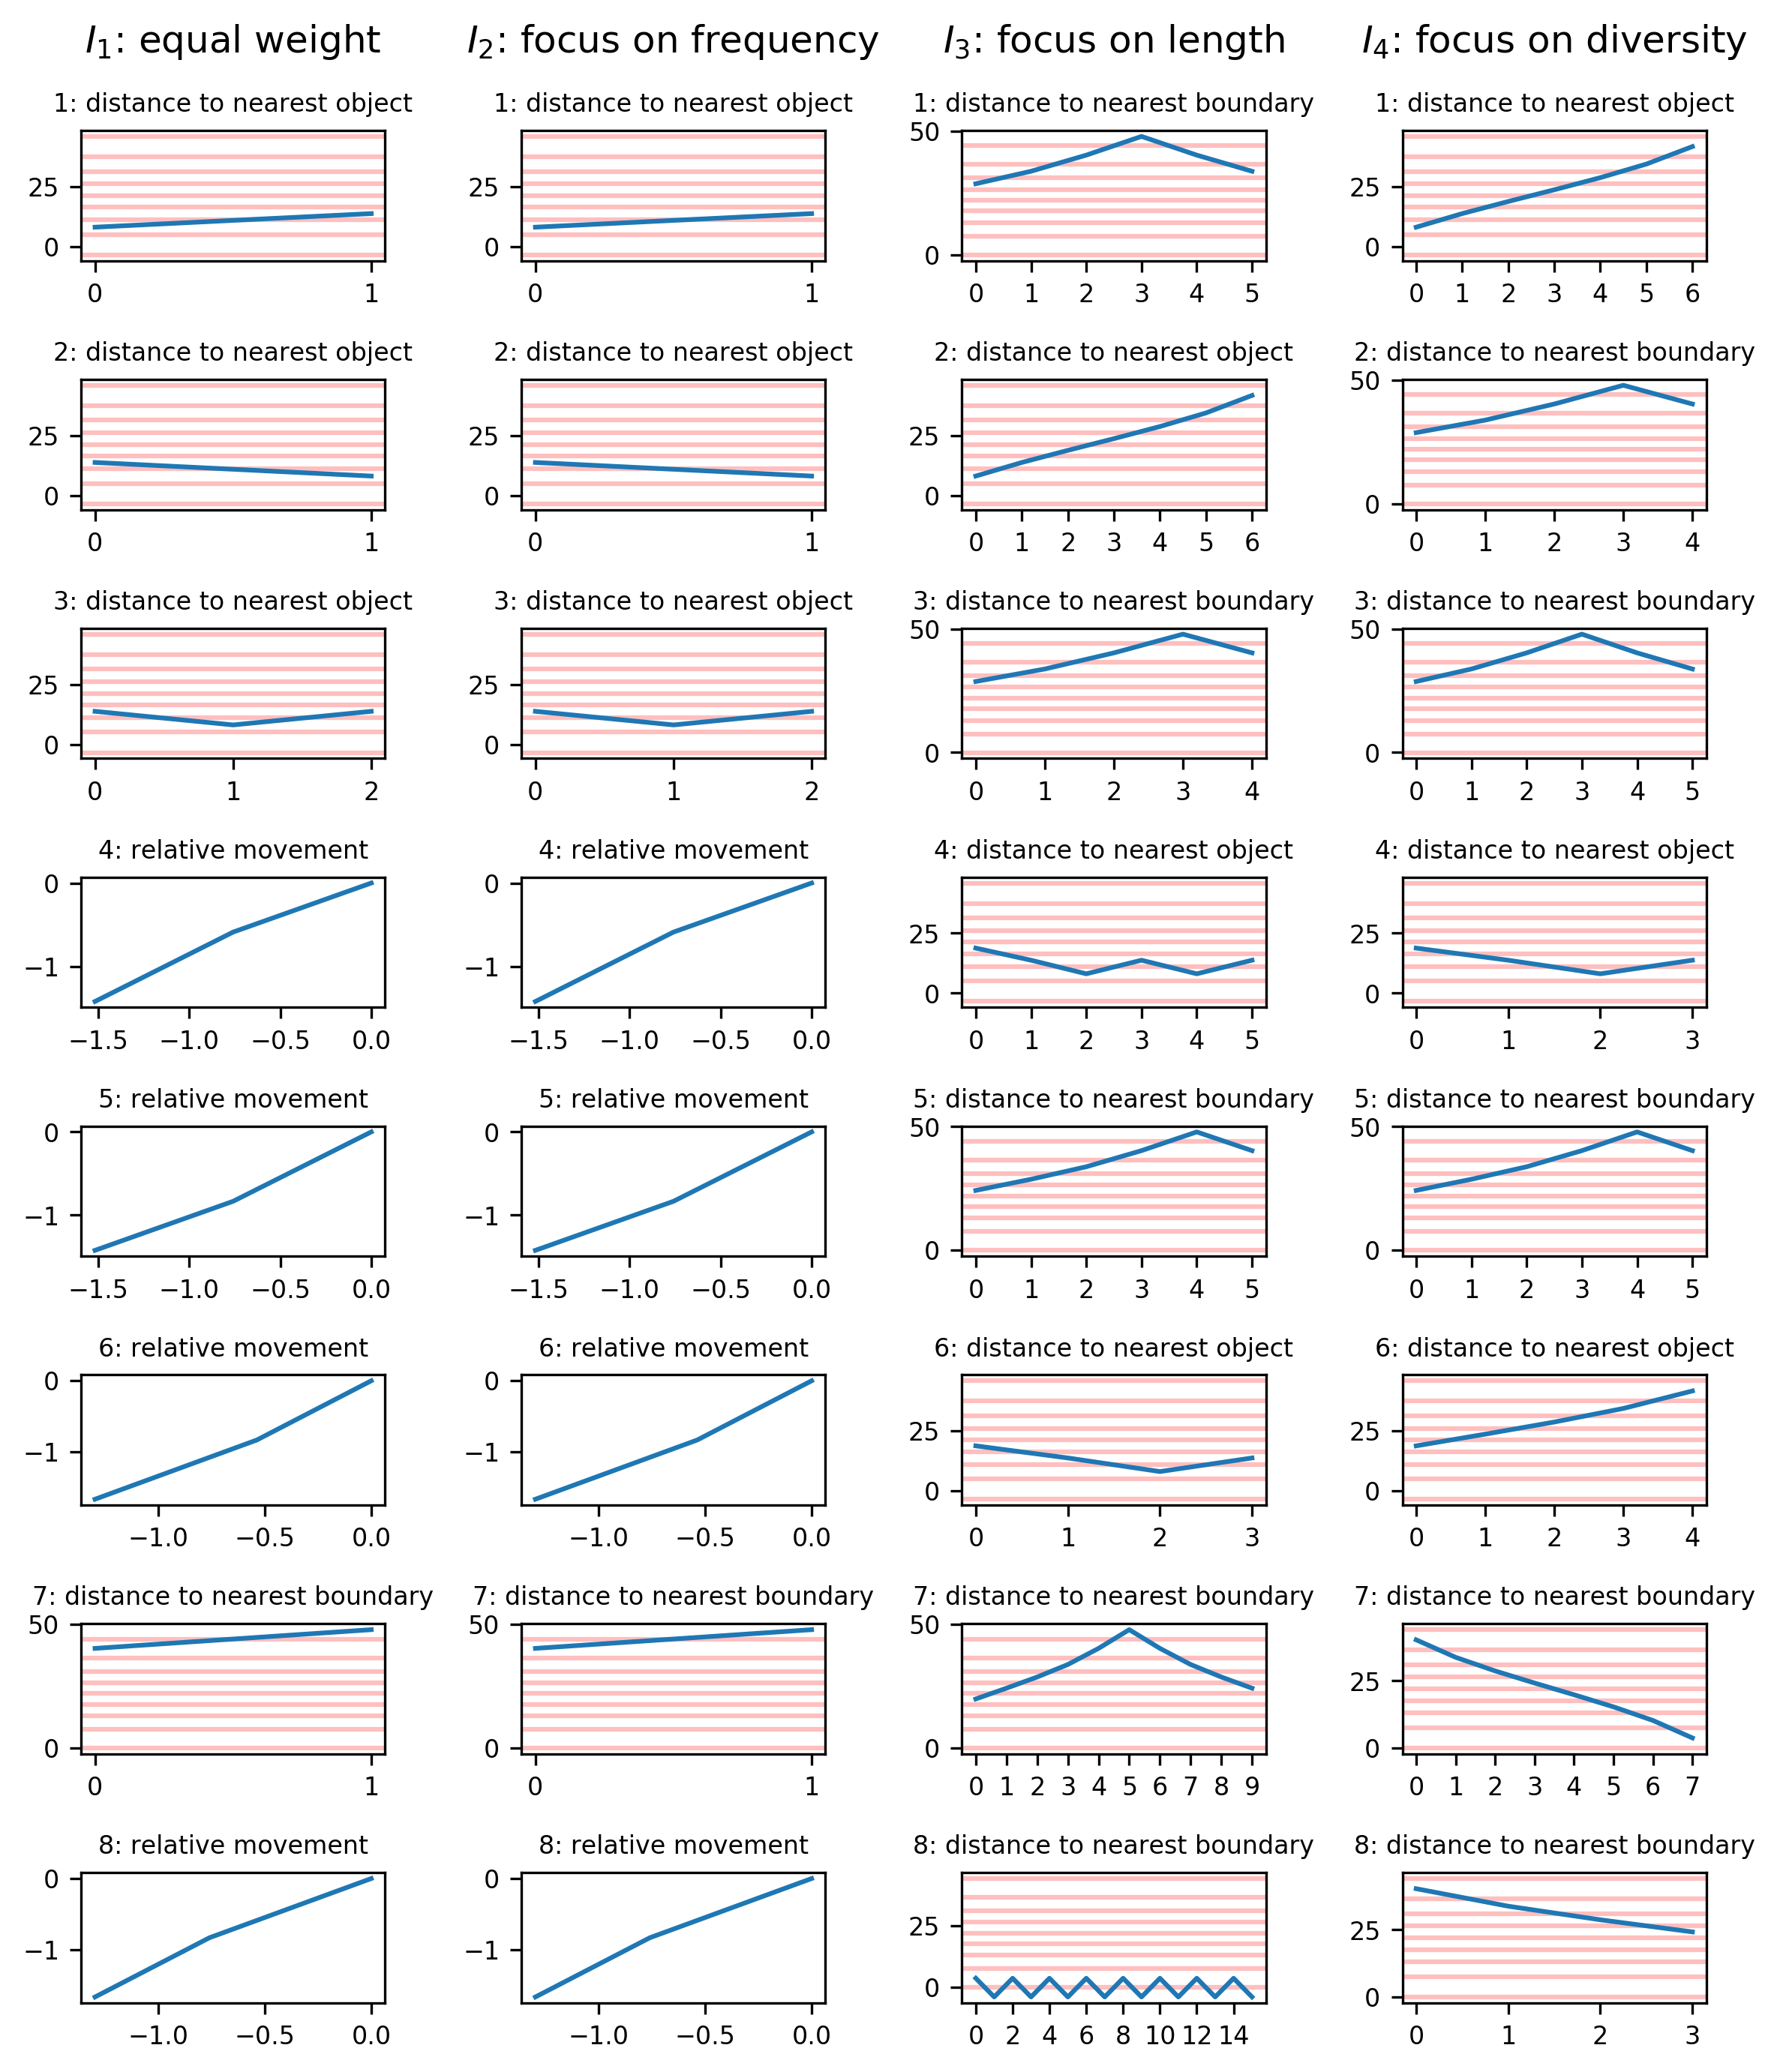

In [335]:
Is = (I1,I2,I3,I4)
fig, ax = plt.subplots(nrows=8,ncols=4,dpi=300,figsize=(8,9))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        I = Is[j]
        motif = I[i]
        lines(col,motif[-1],i)
        if motif[-1] == 'dist_object':
            d = [(a+b)/2 for a,b in convert(motif)]
            col.plot(d)
        elif motif[-1] == 'dist_boundary':
            d = [(a+b)/2 for a,b in convert(motif)]
            col.plot(d)
        elif motif[-1] == 'pos_rel':
            xs = [(a[0]+b[0])/2 for a,b in convert(motif)]
            ys = [(a[1]+b[1])/2 for a,b in convert(motif)]
            col.plot([0,xs[0],xs[0]+xs[1]], [0,ys[0],ys[0]+ys[1]])
        elif motif[-1] == 'pos_abs':
            xs = [(a[0]+b[0])/2 for a,b in convert(motif)]
            ys = [(a[1]+b[1])/2 for a,b in convert(motif)]
            col.plot(xs,ys)

names = ('$I_1$: equal weight', '$I_2$: focus on frequency', '$I_3$: focus on length', '$I_4$: focus on diversity')
for i,col in enumerate(ax[0]):
    col.annotate(names[i], xy=(0.5, 1), xytext=(0, 25),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')
plt.tight_layout()
